## Step 1: Import Required Libraries

In this step, we import libraries needed for data handling and visualization:
- pandas and numpy for data processing
- matplotlib and seaborn for data visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline



## Step 2: Load the Titanic Dataset

We will load the dataset directly from a URL using `pandas.read_csv()`. This dataset contains passenger information like age, class, fare, gender, and whether they survived.


In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Data Overview and Summary

Before diving into analysis, we’ll:
- Check the shape (rows, columns)
- View data types
- Look at null values
- Get statistical summary


In [5]:
print("Dataset shape:", titanic_df.shape)
print("\nData types:\n", titanic_df.dtypes)
print("\nMissing values:\n", titanic_df.isnull().sum())
titanic_df.describe(include='all')


Dataset shape: (891, 12)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Step 4: Handling Missing Values

We clean the dataset by:
- Filling missing 'Age' with median
- Filling missing 'Embarked' with mode
- Dropping 'Cabin' due to too many missing values


In [6]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

titanic_df.drop('Cabin', axis=1, inplace=True)

titanic_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Step 5: Univariate Analysis - Numerical Columns

We will plot distributions of:
- Age
- Fare

to understand how they are spread in the dataset.


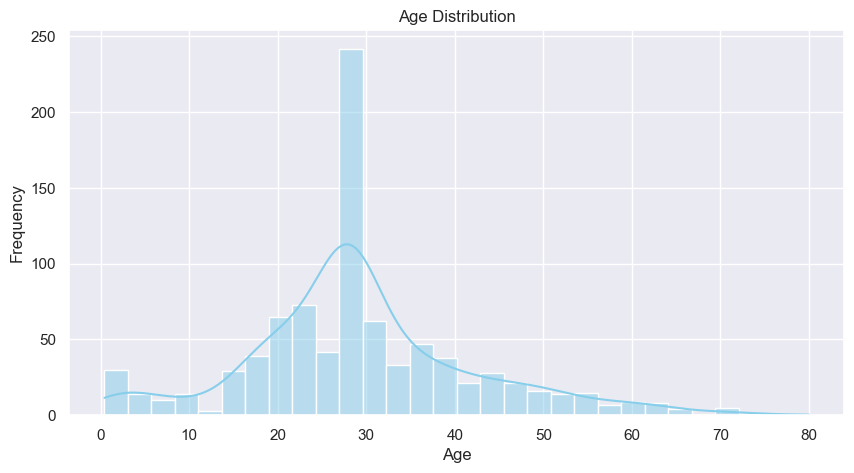

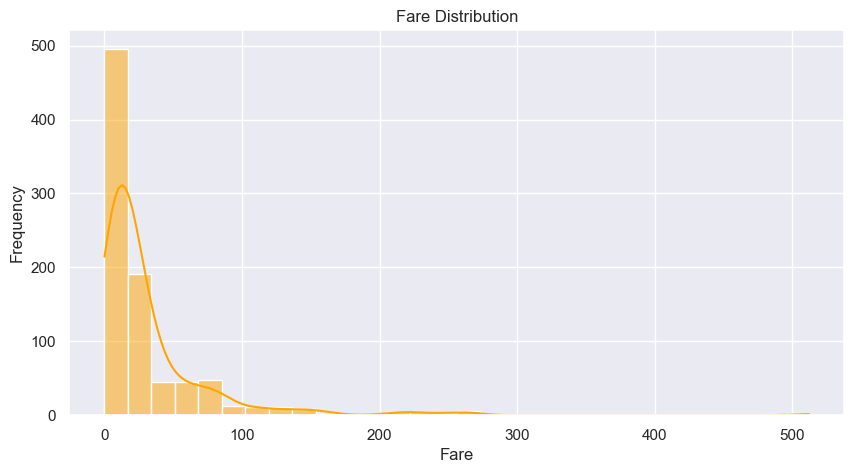

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['Fare'], kde=True, bins=30, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


## Step 6: Univariate Analysis - Categorical Columns

We’ll count the number of passengers by:
- Gender
- Passenger Class
- Embarked Port


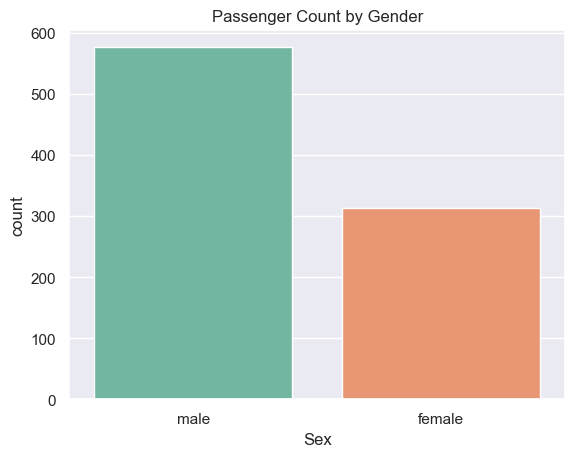

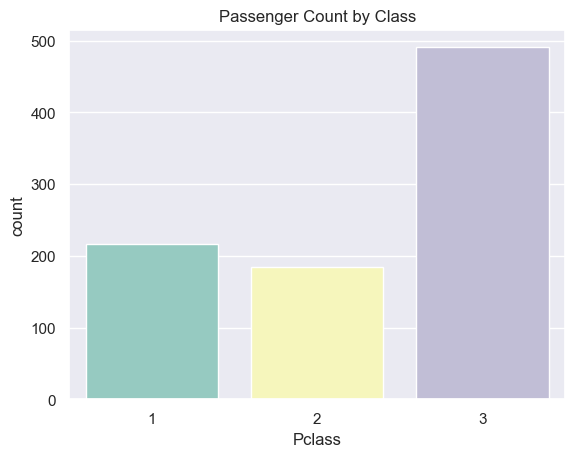

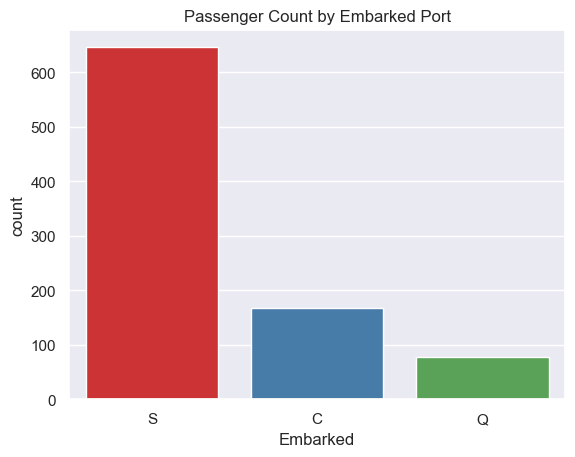

In [9]:
sns.countplot(x='Sex', hue='Sex', data=titanic_df, palette='Set2', legend=False)
plt.title('Passenger Count by Gender')
plt.show()

sns.countplot(x='Pclass', hue='Pclass', data=titanic_df, palette='Set3', legend=False)
plt.title('Passenger Count by Class')
plt.show()

sns.countplot(x='Embarked', hue='Embarked', data=titanic_df, palette='Set1', legend=False)
plt.title('Passenger Count by Embarked Port')
plt.show()



## Step 7: Survival Analysis by Gender and Passenger Class

We analyze how survival rate varies across:
- Gender (`Sex`)
- Passenger Class (`Pclass`)

This helps understand which groups were more likely to survive.


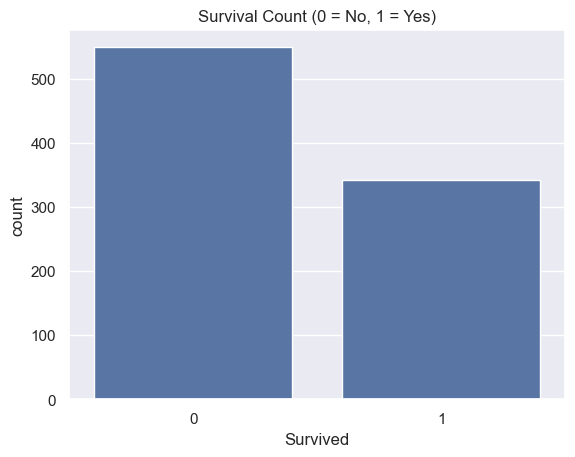

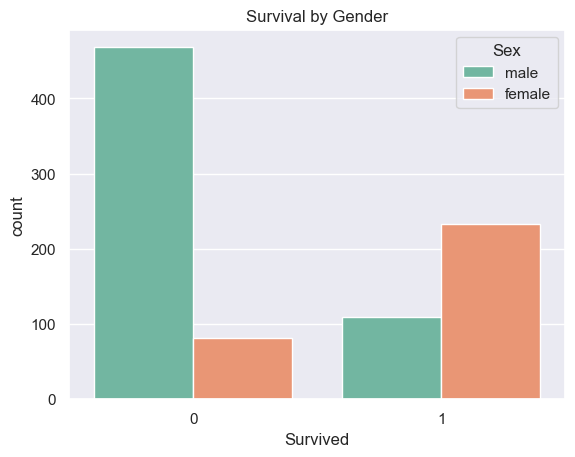

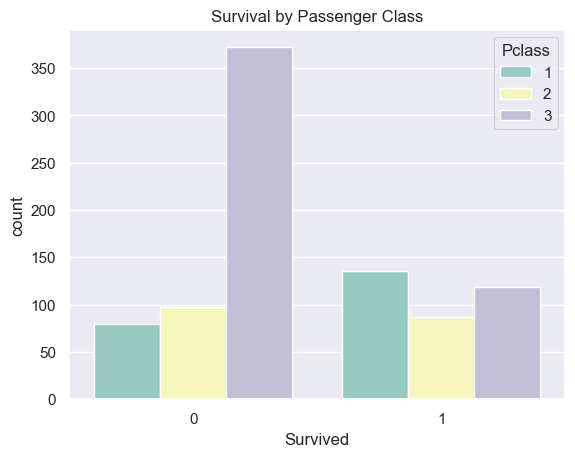

In [10]:
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=titanic_df, palette='Set2')
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.show()


## Step 8: Correlation Heatmap

We convert categorical variables to numeric to compute correlations, then plot a heatmap to see relationships between features.

This helps identify which factors are strongly linked to survival.


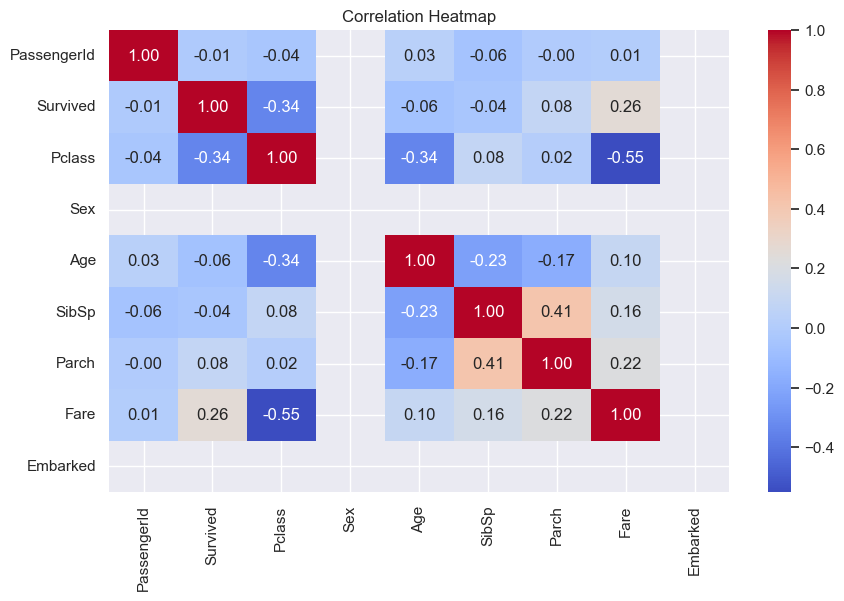

In [12]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

corr = titanic_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Final Summary

- The dataset was cleaned by handling missing values in `Age` and `Embarked` columns, and dropping `Cabin`.
- Distribution plots showed the majority of passengers were between 20-40 years old and mostly traveled in lower classes.
- More females survived compared to males, and survival rate was higher for passengers in first class (`Pclass = 1`).
- Correlation heatmap revealed positive correlation of `Sex` and `Pclass` with survival, indicating gender and class influenced survival chances.
- This exploratory data analysis lays the foundation for building predictive machine learning models in the next projects.
